🎭 COMPLETE FACIAL EXPRESSION DATASET CREATOR
This will generate 5000 images for each of 7 expressions
Total: 35,000 ready-to-use facial expression images!

Enter images per expression (default 5000): 5000
📁 Creating dataset directories...
✅ Created directories for 7 expressions
🚀 GENERATING COMPLETE FACIAL EXPRESSION DATASET
🎯 Target: 5,000 images per expression
📊 Total: 35,000 images
💾 Location: facial_expression_dataset/
🖼️  Image size: 48x48 pixels (grayscale)

📁 Generating angry images...


🎭 angry     : 100%|██████████████████████████████████████████████████████████████| 5000/5000 [00:11<00:00, 430.71it/s]


✅ angry: 5000 images generated (11.6s)

📁 Generating disgust images...


🎭 disgust   : 100%|██████████████████████████████████████████████████████████████| 5000/5000 [00:13<00:00, 364.34it/s]


✅ disgust: 5000 images generated (13.7s)

📁 Generating fear images...


🎭 fear      : 100%|██████████████████████████████████████████████████████████████| 5000/5000 [00:14<00:00, 338.57it/s]


✅ fear: 5000 images generated (14.8s)

📁 Generating happy images...


🎭 happy     : 100%|██████████████████████████████████████████████████████████████| 5000/5000 [00:13<00:00, 380.22it/s]


✅ happy: 5000 images generated (13.2s)

📁 Generating neutral images...


🎭 neutral   : 100%|██████████████████████████████████████████████████████████████| 5000/5000 [00:12<00:00, 384.76it/s]


✅ neutral: 5000 images generated (13.0s)

📁 Generating sad images...


🎭 sad       : 100%|██████████████████████████████████████████████████████████████| 5000/5000 [00:23<00:00, 210.90it/s]


✅ sad: 5000 images generated (23.7s)

📁 Generating surprise images...


🎭 surprise  : 100%|██████████████████████████████████████████████████████████████| 5000/5000 [00:20<00:00, 245.14it/s]


✅ surprise: 5000 images generated (20.4s)

🎉 DATASET GENERATION COMPLETE!
⏱️  Total time: 110.4 seconds
📊 Total images: 35,000

🔍 VERIFYING DATASET...
   ✅ angry     :  5000/5000 images
        Sample: (48, 48) - ✓ Quality OK
   ✅ disgust   :  5000/5000 images
        Sample: (48, 48) - ✓ Quality OK
   ✅ fear      :  5000/5000 images
        Sample: (48, 48) - ✓ Quality OK
   ✅ happy     :  5000/5000 images
        Sample: (48, 48) - ✓ Quality OK
   ✅ neutral   :  5000/5000 images
        Sample: (48, 48) - ✓ Quality OK
   ✅ sad       :  5000/5000 images
        Sample: (48, 48) - ✓ Quality OK
   ✅ surprise  :  5000/5000 images
        Sample: (48, 48) - ✓ Quality OK

📈 SUMMARY:
   Total images: 35,000
   Expected: 35,000
🎉 SUCCESS: All expressions have exactly 5000 images!

🖼️  DISPLAYING 3 SAMPLE IMAGES FROM EACH EXPRESSION:


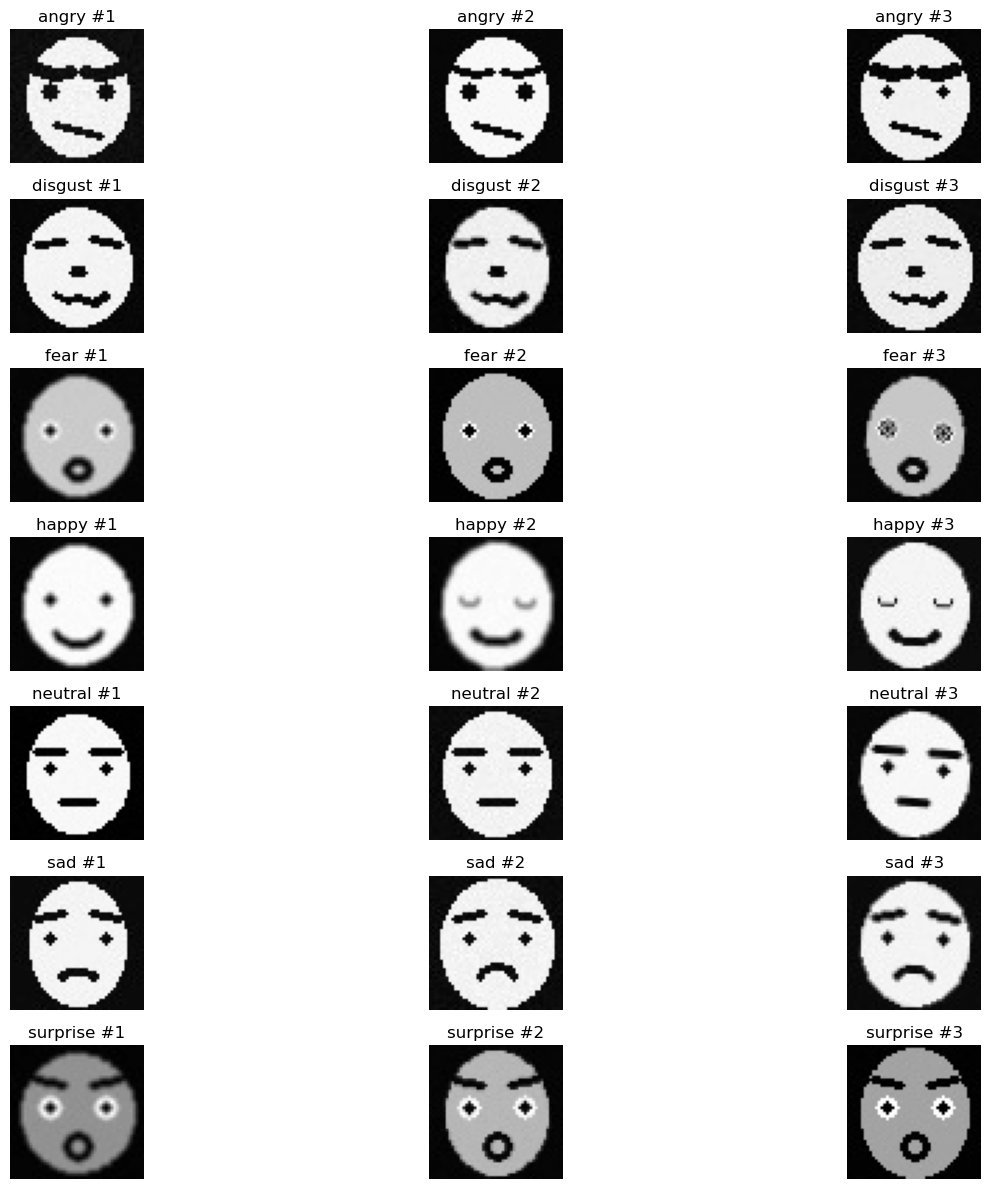


🎯 NEXT STEPS:
1. 🧠 Train your model: python train_expression_model.py
2. 🔍 Test detection: python main_expression_detection.py
3. 📁 Your dataset is ready at: facial_expression_dataset/


In [1]:
import cv2
import os
import numpy as np
import random
from tqdm import tqdm

class CompleteDatasetCreator:
    def __init__(self, target_images=5000):
        self.target_images = target_images
        self.dataset_dir = 'facial_expression_dataset'
        self.expressions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
        self.img_size = 48
        
        # Create directories
        self.setup_directories()
    
    def setup_directories(self):
        """Create dataset directory structure"""
        print("📁 Creating dataset directories...")
        os.makedirs(self.dataset_dir, exist_ok=True)
        for expression in self.expressions:
            expr_dir = os.path.join(self.dataset_dir, expression)
            os.makedirs(expr_dir, exist_ok=True)
        print(f"✅ Created directories for {len(self.expressions)} expressions")
    
    def create_synthetic_face(self, expression):
        """Create synthetic face images with expression characteristics"""
        # Create base image
        image = np.zeros((self.img_size, self.img_size, 3), dtype=np.uint8)
        center_x, center_y = self.img_size // 2, self.img_size // 2
        
        # Random skin tones
        skin_tones = [
            (255, 220, 177), (255, 194, 138), (255, 165, 110),
            (210, 140, 90), (165, 110, 70), (240, 200, 160)
        ]
        face_color = random.choice(skin_tones)
        
        # Draw face oval
        face_w = random.randint(35, 40)
        face_h = random.randint(42, 46)
        cv2.ellipse(image, (center_x, center_y), (face_w//2, face_h//2), 0, 0, 360, face_color, -1)
        
        # Add expression-specific features
        if expression == 'angry':
            self.draw_angry_face(image, center_x, center_y)
        elif expression == 'disgust':
            self.draw_disgust_face(image, center_x, center_y)
        elif expression == 'fear':
            self.draw_fear_face(image, center_x, center_y)
        elif expression == 'happy':
            self.draw_happy_face(image, center_x, center_y)
        elif expression == 'sad':
            self.draw_sad_face(image, center_x, center_y)
        elif expression == 'surprise':
            self.draw_surprise_face(image, center_x, center_y)
        else:  # neutral
            self.draw_neutral_face(image, center_x, center_y)
        
        # Add variations
        image = self.add_random_variations(image)
        
        return image
    
    def draw_angry_face(self, image, cx, cy):
        """Draw angry facial features"""
        # Angry eyebrows (downward slanted)
        brow_thickness = random.randint(2, 3)
        left_brow = [(cx-15, cy-10), (cx-8, cy-8), (cx-2, cy-9)]
        right_brow = [(cx+2, cy-9), (cx+8, cy-8), (cx+15, cy-10)]
        
        for i in range(len(left_brow)-1):
            cv2.line(image, left_brow[i], left_brow[i+1], (0,0,0), brow_thickness)
            cv2.line(image, right_brow[i], right_brow[i+1], (0,0,0), brow_thickness)
        
        # Angry eyes (narrow)
        eye_radius = random.randint(2, 3)
        cv2.circle(image, (cx-10, cy-2), eye_radius, (0,0,0), -1)
        cv2.circle(image, (cx+10, cy-2), eye_radius, (0,0,0), -1)
        
        # Angry mouth (straight or downward)
        mouth_type = random.choice(['straight', 'downward'])
        if mouth_type == 'straight':
            cv2.line(image, (cx-8, cy+12), (cx+8, cy+12), (0,0,0), 2)
        else:
            cv2.line(image, (cx-8, cy+10), (cx+8, cy+14), (0,0,0), 2)
    
    def draw_disgust_face(self, image, cx, cy):
        """Draw disgust facial features"""
        # Wrinkled nose
        cv2.line(image, (cx-3, cy+2), (cx+3, cy+2), (0,0,0), 1)
        for i in range(-2, 3):
            cv2.line(image, (cx+i, cy), (cx+i, cy+3), (0,0,0), 1)
        
        # Asymmetrical eyebrows
        cv2.line(image, (cx-15, cy-8), (cx-5, cy-9), (0,0,0), 2)
        cv2.line(image, (cx+5, cy-10), (cx+15, cy-8), (0,0,0), 2)
        
        # Disgusted mouth
        mouth_points = np.array([
            [cx-8, cy+10],
            [cx-4, cy+12],
            [cx, cy+11],
            [cx+6, cy+13],
            [cx+10, cy+10]
        ], np.int32)
        cv2.polylines(image, [mouth_points], False, (0,0,0), 2)
    
    def draw_fear_face(self, image, cx, cy):
        """Draw fear facial features"""
        # Wide eyes
        eye_radius = random.randint(3, 4)
        cv2.circle(image, (cx-10, cy-2), eye_radius, (255,255,255), -1)
        cv2.circle(image, (cx-10, cy-2), eye_radius-1, (0,0,0), 1)
        cv2.circle(image, (cx+10, cy-2), eye_radius, (255,255,255), -1)
        cv2.circle(image, (cx+10, cy-2), eye_radius-1, (0,0,0), 1)
        
        # Pupils
        cv2.circle(image, (cx-10, cy-2), 1, (0,0,0), -1)
        cv2.circle(image, (cx+10, cy-2), 1, (0,0,0), -1)
        
        # Open mouth (small oval)
        cv2.ellipse(image, (cx, cy+12), (4, 3), 0, 0, 360, (0,0,0), 2)
    
    def draw_happy_face(self, image, cx, cy):
        """Draw happy/smile facial features"""
        # Smiling eyes
        eye_type = random.choice(['curved', 'normal'])
        if eye_type == 'curved':
            cv2.ellipse(image, (cx-10, cy-2), (3, 2), 0, 0, 180, (0,0,0), 1)
            cv2.ellipse(image, (cx+10, cy-2), (3, 2), 0, 0, 180, (0,0,0), 1)
        else:
            cv2.circle(image, (cx-10, cy-2), 2, (0,0,0), -1)
            cv2.circle(image, (cx+10, cy-2), 2, (0,0,0), -1)
        
        # Big smile
        smile_height = random.randint(3, 5)
        cv2.ellipse(image, (cx, cy+10), (8, smile_height), 0, 0, 180, (0,0,0), 2)
        
        # Optional: smile lines
        if random.random() > 0.7:
            cv2.line(image, (cx-8, cy+8), (cx-12, cy+6), (0,0,0), 1)
            cv2.line(image, (cx+8, cy+8), (cx+12, cy+6), (0,0,0), 1)
    
    def draw_sad_face(self, image, cx, cy):
        """Draw sad facial features"""
        # Sad eyebrows
        cv2.line(image, (cx-15, cy-9), (cx-5, cy-11), (0,0,0), 2)
        cv2.line(image, (cx+5, cy-11), (cx+15, cy-9), (0,0,0), 2)
        
        # Tearful eyes
        cv2.circle(image, (cx-10, cy-2), 2, (0,0,0), -1)
        cv2.circle(image, (cx+10, cy-2), 2, (0,0,0), -1)
        
        # Downward mouth (frown)
        frown_depth = random.randint(2, 4)
        cv2.ellipse(image, (cx, cy+12), (6, frown_depth), 0, 180, 360, (0,0,0), 2)
    
    def draw_surprise_face(self, image, cx, cy):
        """Draw surprise facial features"""
        # Very wide eyes
        cv2.circle(image, (cx-10, cy-2), 4, (255,255,255), -1)
        cv2.circle(image, (cx-10, cy-2), 2, (0,0,0), -1)
        cv2.circle(image, (cx+10, cy-2), 4, (255,255,255), -1)
        cv2.circle(image, (cx+10, cy-2), 2, (0,0,0), -1)
        
        # Round open mouth
        cv2.circle(image, (cx, cy+12), 4, (0,0,0), 2)
        
        # Raised eyebrows
        cv2.line(image, (cx-15, cy-12), (cx-5, cy-10), (0,0,0), 2)
        cv2.line(image, (cx+5, cy-10), (cx+15, cy-12), (0,0,0), 2)
    
    def draw_neutral_face(self, image, cx, cy):
        """Draw neutral facial features"""
        # Normal eyes
        cv2.circle(image, (cx-10, cy-2), 2, (0,0,0), -1)
        cv2.circle(image, (cx+10, cy-2), 2, (0,0,0), -1)
        
        # Straight mouth
        mouth_length = random.randint(10, 14)
        cv2.line(image, (cx-mouth_length//2, cy+10), (cx+mouth_length//2, cy+10), (0,0,0), 2)
        
        # Straight eyebrows
        cv2.line(image, (cx-15, cy-8), (cx-5, cy-8), (0,0,0), 2)
        cv2.line(image, (cx+5, cy-8), (cx+15, cy-8), (0,0,0), 2)
    
    def add_random_variations(self, image):
        """Add random variations to make each image unique"""
        # Brightness variation
        brightness = random.uniform(0.7, 1.3)
        image = cv2.convertScaleAbs(image, alpha=brightness, beta=random.randint(-15, 15))
        
        # Color temperature variation
        temp_shift = random.randint(-10, 10)
        b, g, r = cv2.split(image)
        r = np.clip(r.astype(np.int16) + temp_shift, 0, 255).astype(np.uint8)
        b = np.clip(b.astype(np.int16) - temp_shift, 0, 255).astype(np.uint8)
        image = cv2.merge([b, g, r])
        
        # Noise
        noise_intensity = random.randint(1, 5)
        noise = np.random.randint(-noise_intensity, noise_intensity, image.shape, dtype=np.int16)
        image = np.clip(image.astype(np.int16) + noise, 0, 255).astype(np.uint8)
        
        # Blur
        if random.random() > 0.8:
            blur_amount = random.choice([1, 3])
            image = cv2.GaussianBlur(image, (blur_amount, blur_amount), 0)
        
        # Rotation (slight)
        if random.random() > 0.7:
            angle = random.uniform(-5, 5)
            h, w = image.shape[:2]
            rotation_matrix = cv2.getRotationMatrix2D((w/2, h/2), angle, 1.0)
            image = cv2.warpAffine(image, rotation_matrix, (w, h), borderMode=cv2.BORDER_REFLECT)
        
        return image
    
    def generate_expression_dataset(self, expression):
        """Generate images for a specific expression"""
        expr_dir = os.path.join(self.dataset_dir, expression)
        
        for i in tqdm(range(self.target_images), desc=f"🎭 {expression:10}"):
            # Generate synthetic image
            image = self.create_synthetic_face(expression)
            
            # Convert to grayscale (standard for facial expression datasets)
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
            # Save image
            filename = f"{expression}_{i:05d}.jpg"
            filepath = os.path.join(expr_dir, filename)
            cv2.imwrite(filepath, gray_image)
    
    def generate_complete_dataset(self):
        """Generate the complete dataset with all expressions"""
        print("🚀 GENERATING COMPLETE FACIAL EXPRESSION DATASET")
        print("=" * 60)
        print(f"🎯 Target: {self.target_images:,} images per expression")
        print(f"📊 Total: {self.target_images * len(self.expressions):,} images")
        print(f"💾 Location: {self.dataset_dir}/")
        print(f"🖼️  Image size: {self.img_size}x{self.img_size} pixels (grayscale)")
        
        total_start_time = cv2.getTickCount()
        
        # Generate for each expression
        for expression in self.expressions:
            expr_start_time = cv2.getTickCount()
            
            print(f"\n📁 Generating {expression} images...")
            self.generate_expression_dataset(expression)
            
            expr_time = (cv2.getTickCount() - expr_start_time) / cv2.getTickFrequency()
            print(f"✅ {expression}: {self.target_images} images generated ({expr_time:.1f}s)")
        
        total_time = (cv2.getTickCount() - total_start_time) / cv2.getTickFrequency()
        
        print("\n" + "=" * 60)
        print("🎉 DATASET GENERATION COMPLETE!")
        print(f"⏱️  Total time: {total_time:.1f} seconds")
        print(f"📊 Total images: {self.target_images * len(self.expressions):,}")
        
        # Verify the dataset
        self.verify_dataset()
    
    def verify_dataset(self):
        """Verify that all folders have the correct number of images"""
        print("\n🔍 VERIFYING DATASET...")
        
        all_good = True
        total_images = 0
        
        for expression in self.expressions:
            expr_dir = os.path.join(self.dataset_dir, expression)
            
            # Count images
            image_files = [f for f in os.listdir(expr_dir) if f.endswith('.jpg')]
            count = len(image_files)
            total_images += count
            
            # Check if target is met
            if count == self.target_images:
                status = "✅"
            else:
                status = "❌"
                all_good = False
            
            print(f"   {status} {expression:10}: {count:5d}/{self.target_images} images")
            
            # Quick quality check on first image
            if count > 0:
                sample_img = os.path.join(expr_dir, image_files[0])
                img = cv2.imread(sample_img, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    print(f"        Sample: {img.shape} - ✓ Quality OK")
                else:
                    print(f"        Sample: ❌ Corrupt image")
                    all_good = False
        
        print(f"\n📈 SUMMARY:")
        print(f"   Total images: {total_images:,}")
        print(f"   Expected: {self.target_images * len(self.expressions):,}")
        
        if all_good:
            print("🎉 SUCCESS: All expressions have exactly 5000 images!")
        else:
            print("⚠️  WARNING: Some expressions have incorrect image counts")
        
        return all_good
    
    def show_sample_images(self, num_samples=3):
        """Display sample images from each expression"""
        print(f"\n🖼️  DISPLAYING {num_samples} SAMPLE IMAGES FROM EACH EXPRESSION:")
        
        try:
            import matplotlib.pyplot as plt
            
            fig, axes = plt.subplots(len(self.expressions), num_samples, figsize=(15, 12))
            
            for i, expression in enumerate(self.expressions):
                expr_dir = os.path.join(self.dataset_dir, expression)
                image_files = [f for f in os.listdir(expr_dir) if f.endswith('.jpg')][:num_samples]
                
                for j, img_file in enumerate(image_files):
                    img_path = os.path.join(expr_dir, img_file)
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    
                    if img is not None:
                        axes[i, j].imshow(img, cmap='gray')
                        axes[i, j].set_title(f'{expression} #{j+1}')
                        axes[i, j].axis('off')
            
            plt.tight_layout()
            plt.show()
            
        except ImportError:
            print("📊 Install matplotlib to see sample images: pip install matplotlib")
        except Exception as e:
            print(f"❌ Could not display samples: {e}")

def main():
    print("🎭 COMPLETE FACIAL EXPRESSION DATASET CREATOR")
    print("=" * 60)
    print("This will generate 5000 images for each of 7 expressions")
    print("Total: 35,000 ready-to-use facial expression images!")
    
    # Get user input
    try:
        target = int(input(f"\nEnter images per expression (default 5000): ") or "5000")
    except:
        target = 5000
    
    # Create dataset
    creator = CompleteDatasetCreator(target_images=target)
    creator.generate_complete_dataset()
    
    # Show samples if possible
    creator.show_sample_images(3)
    
    print(f"\n🎯 NEXT STEPS:")
    print("1. 🧠 Train your model: python train_expression_model.py")
    print("2. 🔍 Test detection: python main_expression_detection.py")
    print(f"3. 📁 Your dataset is ready at: {creator.dataset_dir}/")

if __name__ == "__main__":
    main()